In [1]:
import tensorflow as tf 
import os

In [2]:
import cv2

import matplotlib.pyplot as plt
import numpy as np

In [3]:
import random

In [4]:
Datadirectory="train/"

In [5]:
Classes=["0","1","2","3","4","5","6"]

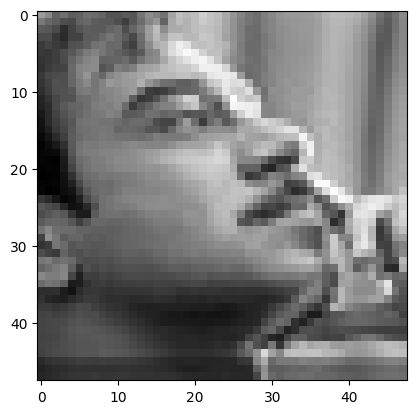

In [6]:
for category in Classes:
    path=os.path.join(Datadirectory,category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break

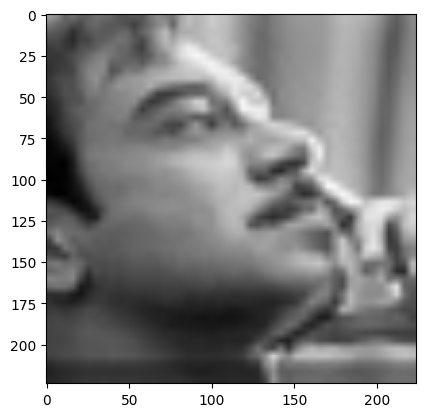

In [7]:
img_size=224
new_array=cv2.resize(img_array,(img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [8]:
new_array.shape

(224, 224, 3)

In [9]:
# def delete_half_of_files_in_folders(parent_folder):
#     for folder_name in range(7):  # Assuming 7 folders from 0 to 6
#         folder_path = os.path.join(parent_folder, str(folder_name))

#         # Check if the folder exists
#         if os.path.exists(folder_path):
#             # Get a list of all files in the folder
#             files = os.listdir(folder_path)

#             # Calculate the number of files to delete (half of the total)
#             num_files_to_delete = len(files) // 2

#             # Randomly select files to delete
#             files_to_delete = random.sample(files, num_files_to_delete)

#             # Iterate through selected files and delete them
#             for file_name in files_to_delete:
#                 file_path = os.path.join(folder_path, file_name)
#                 os.remove(file_path)
#                 print(f"Deleted: {file_path}")

# # Specify the path to the parent folder containing folders 0 to 6
# parent_folder_path = r'C:\Users\Administrator\Desktop\Seminarska\archive\train'

# # Call the function to delete half of the files in each folder
# delete_half_of_files_in_folders(parent_folder_path)


In [10]:
training_data=[]

def create_training_Data():
    for category in Classes:
        path=os.path.join(Datadirectory,category)
        class_num=Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_arrays=cv2.resize(img_array,(img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass


In [11]:
create_training_Data()


In [12]:

from tensorflow.python.client import device_lib

physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], True)



In [13]:
random.shuffle(training_data)

In [14]:
X=[]
Y=[]
for features,label in training_data:
    X.append(features)
    Y.append(label)
X=np.array(X).reshape(-1,img_size,img_size,3)
#convert to 4d

In [15]:
X.shape

(1798, 224, 224, 3)

In [16]:
#normalize
X=X/255.0

In [17]:
print(X)

[[[[0.60784314 0.60784314 0.60784314]
   [0.60784314 0.60784314 0.60784314]
   [0.60392157 0.60392157 0.60392157]
   ...
   [0.5372549  0.5372549  0.5372549 ]
   [0.54117647 0.54117647 0.54117647]
   [0.54117647 0.54117647 0.54117647]]

  [[0.60784314 0.60784314 0.60784314]
   [0.60784314 0.60784314 0.60784314]
   [0.60392157 0.60392157 0.60392157]
   ...
   [0.5372549  0.5372549  0.5372549 ]
   [0.54117647 0.54117647 0.54117647]
   [0.54117647 0.54117647 0.54117647]]

  [[0.60392157 0.60392157 0.60392157]
   [0.60392157 0.60392157 0.60392157]
   [0.6        0.6        0.6       ]
   ...
   [0.5372549  0.5372549  0.5372549 ]
   [0.54117647 0.54117647 0.54117647]
   [0.54117647 0.54117647 0.54117647]]

  ...

  [[0.14901961 0.14901961 0.14901961]
   [0.14901961 0.14901961 0.14901961]
   [0.14901961 0.14901961 0.14901961]
   ...
   [0.42745098 0.42745098 0.42745098]
   [0.42745098 0.42745098 0.42745098]
   [0.42745098 0.42745098 0.42745098]]

  [[0.14901961 0.14901961 0.14901961]
   [0.1

In [18]:
Y=np.array(Y)

In [19]:
Y.shape

(1798,)

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

In [21]:
model=tf.keras.applications.MobileNetV2()


In [22]:
model.summary()

Model: "mobilenetv2_1.00_224"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 112, 112, 32  864         ['input_1[0][0]']                
                                )                                                                 
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 112, 112, 32  128         ['Conv1[0][0]']                  
                                )                                              

#Transfer learning 





In [23]:
base_input=model.layers[0].input

In [24]:
base_output=model.layers[-2].output

In [25]:
from tensorflow.keras import layers, Model
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
output_layer = layers.Dense(7, activation='softmax')(final_output)


In [26]:
new_model=keras.Model(inputs=base_input,outputs=final_output)

In [27]:
new_model.compile(loss="sparse_categorical_crossentropy",optimizer="adam",metrics=['accuracy'])

In [28]:
from tensorflow.keras.utils import to_categorical

Y_one_hot = to_categorical(Y, num_classes=7)


In [29]:
print(X.shape, Y_one_hot.shape)


(1798, 224, 224, 3) (1798, 7)


In [30]:
# from tensorflow.keras.backend import clear_session
# clear_session()


In [32]:
with tf.device('/GPU:0'):
    new_model.fit(X, Y, epochs=15,batch_size=4)


InternalError: Failed copying input tensor from /job:localhost/replica:0/task:0/device:CPU:0 to /job:localhost/replica:0/task:0/device:GPU:0 in order to run _EagerConst: Dst tensor is not initialized.

In [ ]:
new_model.save("final_model")

In [ ]:
frame=cv2.imread("happy_boy.jpg")

In [ ]:
frame.shape

In [ ]:
face_cascade=cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

In [ ]:
gray=cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)

In [ ]:
new_model=tf.keras.model.load_model("final_model")